# Assignment 2

## Nama    : Ida Nur Laela
## Program : Python for Data Science
## Batch   : 4/015
Dataset : nyc-rolling-sales.csv

# Import modules

In [90]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

In [2]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') 

# Import Package

In [3]:
import math
import statistics
import scipy.stats

In [4]:
pd.set_option("display.max.columns", None)

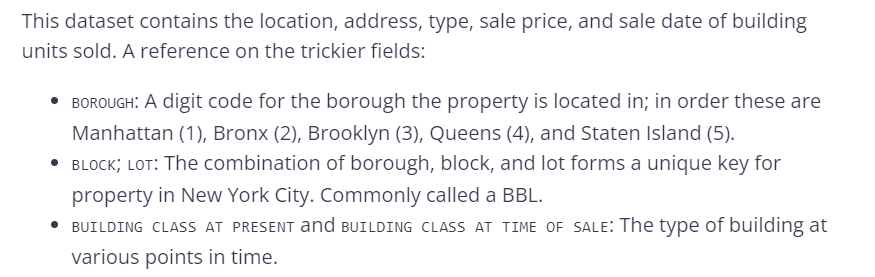

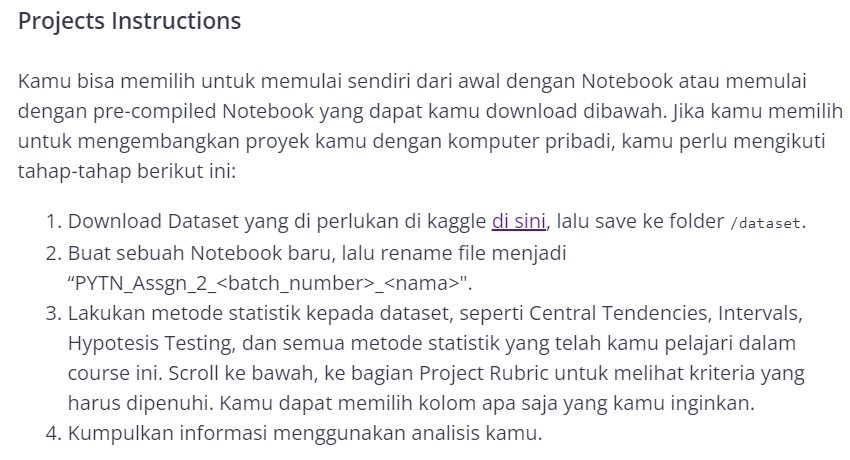

# Read Data

In [5]:
df = pd.read_csv("nyc-rolling-sales.csv")
df

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,,10309,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,,10309,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,,10309,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,,10309,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


In [6]:
# melihat gambaran data pada baris awal
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


Dataset tersebut berisi variabel-variabel dengan keterangan sebagai berikut : lokasi, alamat, jenis, harga jual, dan tanggal penjualan unit bangunan yang terjual.

# Prepocessing Data

In [7]:
# melihat tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [8]:
# melihat jumlah baris dan kolom
df.shape

(84548, 22)

In [9]:
# mengahapus unnamed atau data yang tidak memiliki nama
df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [10]:
# mengubah kolom sale date menjadi date time
df['SALE DATE']= pd.to_datetime(df['SALE DATE'], errors='coerce')

In [11]:
# mengubah type data menjadi numeric
numeric = ["RESIDENTIAL UNITS","COMMERCIAL UNITS","TOTAL UNITS", "LAND SQUARE FEET" , "GROSS SQUARE FEET","SALE PRICE" ]

for col in numeric: 
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [13]:
# mengubah tipe data menjadi categorical
categorical = ["BOROUGH","NEIGHBORHOOD",'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT','ZIP CODE', 'YEAR BUILT', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE']

for col in categorical: 
    df[col] = df[col].astype("category")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  category      
 1   NEIGHBORHOOD                    84548 non-null  category      
 2   BUILDING CLASS CATEGORY         84548 non-null  category      
 3   TAX CLASS AT PRESENT            84548 non-null  category      
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   EASE-MENT                       84548 non-null  object        
 7   BUILDING CLASS AT PRESENT       84548 non-null  category      
 8   ADDRESS                         84548 non-null  object        
 9   APARTMENT NUMBER                84548 non-null  object        
 10  ZIP CODE                        84548 non-null  category      
 11  RE

In [15]:
# mendapatkan nilai kolom yang unik
counts = df.nunique()
counts

BOROUGH                               5
NEIGHBORHOOD                        254
BUILDING CLASS CATEGORY              47
TAX CLASS AT PRESENT                 11
BLOCK                             11566
LOT                                2627
EASE-MENT                             1
BUILDING CLASS AT PRESENT           167
ADDRESS                           67563
APARTMENT NUMBER                   3989
ZIP CODE                            186
RESIDENTIAL UNITS                   176
COMMERCIAL UNITS                     55
TOTAL UNITS                         192
LAND SQUARE FEET                   6061
GROSS SQUARE FEET                  5690
YEAR BUILT                          158
TAX CLASS AT TIME OF SALE             4
BUILDING CLASS AT TIME OF SALE      166
SALE PRICE                        10007
SALE DATE                           364
dtype: int64

Dari hasil diatas terlihat bahwa terdapat nilai tunggal yaitu kolom east-ment

In [16]:
#Drop kolom EASE-MENT
df.drop(["EASE-MENT"], axis=1, inplace=True)

# Analisis Duplicated Data

In [17]:
dups = df.duplicated()
print(dups.any())

True


Dari hasil tersebut bernilai 'true' sehingga terdapat duplikasi data pada dataset

In [18]:
# melihat jumlah data terduplikasi
df.duplicated().sum()

765

In [19]:
# menghapus data yang terduplikasi
df.drop_duplicates()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,,10309,2,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,,10309,2,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,,10309,2,0,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,,10309,0,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21


In [20]:
df.drop_duplicates().reset_index()

,index,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
1,1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14
2,2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09
3,3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83778,84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,,10309,2,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28
83779,84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,,10309,2,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21
83780,84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,,10309,2,0,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05
83781,84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,,10309,0,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21


In [21]:
df = df.drop_duplicates().reset_index(drop=True)

In [22]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17


In [23]:
df.describe()

,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
count,83783.000000,83783.000000,83783.000000,83783.000000,83783.000000,5.772900e+04,5.639800e+04,6.960700e+04
mean,4242.903155,376.137415,1.999976,0.183677,2.213504,3.854481e+03,3.894416e+03,1.280703e+06
std,3568.789482,658.021286,16.569118,8.576582,18.777727,4.154737e+04,3.483726e+04,1.143036e+07
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,1326.000000,22.000000,0.000000,0.000000,1.000000,1.643000e+03,1.040000e+03,2.300000e+05
50%,3319.000000,50.000000,1.000000,0.000000,1.000000,2.314000e+03,1.680000e+03,5.330000e+05
75%,6295.000000,1001.000000,2.000000,0.000000,2.000000,3.500000e+03,2.552000e+03,9.500000e+05
max,16322.000000,9106.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2.210000e+09


# Cleaning Dataset

In [24]:
# mengecek missing value atau data yang null
df.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26054
GROSS SQUARE FEET                 27385
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14176
SALE DATE                             0
dtype: int64

In [25]:
from numpy import nan

df = df.replace(' ', nan)

In [26]:
df.isna().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                738
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT           738
ADDRESS                               0
APARTMENT NUMBER                  64934
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26054
GROSS SQUARE FEET                 27385
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14176
SALE DATE                             0
dtype: int64

In [27]:
df.isna().sum() /len(df) *100

BOROUGH                            0.000000
NEIGHBORHOOD                       0.000000
BUILDING CLASS CATEGORY            0.000000
TAX CLASS AT PRESENT               0.880847
BLOCK                              0.000000
LOT                                0.000000
BUILDING CLASS AT PRESENT          0.880847
ADDRESS                            0.000000
APARTMENT NUMBER                  77.502596
ZIP CODE                           0.000000
RESIDENTIAL UNITS                  0.000000
COMMERCIAL UNITS                   0.000000
TOTAL UNITS                        0.000000
LAND SQUARE FEET                  31.097001
GROSS SQUARE FEET                 32.685628
YEAR BUILT                         0.000000
TAX CLASS AT TIME OF SALE          0.000000
BUILDING CLASS AT TIME OF SALE     0.000000
SALE PRICE                        16.919900
SALE DATE                          0.000000
dtype: float64

In [28]:
# handling Missing Value
df.drop(labels=['APARTMENT NUMBER'], axis=1, inplace=True)

In [29]:
# replacing missing values

df['TAX CLASS AT PRESENT'].fillna(df['TAX CLASS AT PRESENT'].mode()[0], inplace=True)
df['BUILDING CLASS AT PRESENT'].fillna(df['BUILDING CLASS AT PRESENT'].mode()[0], inplace=True)

In [30]:
df1 = df.dropna()

In [31]:
df1.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

# Central Tendencies

## Mean

In [32]:
mean_residential_units = statistics.mean(df['RESIDENTIAL UNITS'])
mean_residential_units

1.9999761288089468

In [36]:
mean_commercial_units = statistics.mean(df['COMMERCIAL UNITS'])
mean_commercial_units

0.18367687955790554

In [37]:
mean_total_units = statistics.mean(df1['TOTAL UNITS'])
mean_total_units

2.791318690496075

In [40]:
mean_land_square_feet = statistics.mean(df1['LAND SQUARE FEET'])
mean_land_square_feet

3270.9037706697845

In [41]:
mean_gross_square_feet = statistics.mean(df1['GROSS SQUARE FEET'])
mean_gross_square_feet

3525.874749457157

In [42]:
mean_sale_price = statistics.mean(df1['SALE PRICE'])
mean_sale_price

1158309.9487222314

## Median

In [43]:
median_residential_units = statistics.median(df1['RESIDENTIAL UNITS'])
median_residential_units

1.0

In [44]:
median_commercial_units = statistics.median(df['COMMERCIAL UNITS'])
median_commercial_units

0

In [45]:
median_total_units = statistics.median(df1['TOTAL UNITS'])
median_total_units

1.0

In [46]:
median_land_square_feet = statistics.median(df1['LAND SQUARE FEET'])
median_land_square_feet

2133.0

In [47]:
median_gross_square_feet = statistics.median(df1['GROSS SQUARE FEET'])
median_gross_square_feet

1620.0

In [48]:
median_sale_price = statistics.median(df1['SALE PRICE'])
median_sale_price

485000.0

## Modus

In [49]:
mode_borough = scipy.stats.mode(df['BOROUGH'])
mode_borough

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2940\2052774305.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_borough = scipy.stats.mode(df['BOROUGH'])


ModeResult(mode=array([4], dtype=int64), count=array([26548]))

In [50]:
mode_neighborhood = scipy.stats.mode(df['NEIGHBORHOOD'])
mode_neighborhood

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2940\987015376.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_neighborhood = scipy.stats.mode(df['NEIGHBORHOOD'])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_2940\987015376.py:1: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  mode_neighborhood = scipy.stats.mode(df['NEIGHBORHOOD'])


ModeResult(mode=array(['FLUSHING-NORTH'], dtype=object), count=array([3058]))

In [51]:
mode_build_class = scipy.stats.mode(df['BUILDING CLASS CATEGORY'])
mode_build_class

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2940\2026028536.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_build_class = scipy.stats.mode(df['BUILDING CLASS CATEGORY'])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_2940\2026028536.py:1: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  mode_build_class = scipy.stats.mode(df['BUILDING CLASS CATEGORY'])


ModeResult(mode=array(['01 ONE FAMILY DWELLINGS                    '], dtype=object), count=array([18107]))

In [52]:
mode_building_class_at_present = scipy.stats.mode(df['BUILDING CLASS AT PRESENT'])
mode_building_class_at_present

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2940\2219114801.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_building_class_at_present = scipy.stats.mode(df['BUILDING CLASS AT PRESENT'])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_2940\2219114801.py:1: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  mode_building_class_at_present = scipy.stats.mode(df['BUILDING CLASS AT PRESENT'])


ModeResult(mode=array(['D4'], dtype=object), count=array([13375]))

## Range

In [53]:
np.ptp(df1['TOTAL UNITS'])

2261

In [54]:
np.ptp(df1['COMMERCIAL UNITS'])

2261

In [55]:
np.ptp(df1['RESIDENTIAL UNITS'])

1844

In [56]:
np.ptp(df1['LAND SQUARE FEET'])

4228300.0

In [57]:
np.ptp(df1['GROSS SQUARE FEET'])

3750565.0

In [58]:
np.ptp(df1['SALE PRICE'])

2210000000.0

## Variance 

In [59]:
var_commercial_units = statistics.variance(df1['COMMERCIAL UNITS'])
var_commercial_units

117.62545116848761

In [60]:
var_residential_units = statistics.variance(df1['RESIDENTIAL UNITS'])
var_residential_units

294.80650802798135

In [61]:
var_total_units = statistics.variance(df1['TOTAL UNITS'])
var_total_units

417.2964031801129

In [62]:
var_land_square_feet = statistics.variance(df1['LAND SQUARE FEET'])
var_land_square_feet

933292915.5861255

In [63]:
var_gross_square_feet = statistics.variance(df1['GROSS SQUARE FEET'])
var_gross_square_feet

852938213.028325

In [64]:
var_sale_price = statistics.variance(df1['SALE PRICE'])
var_sale_price

180704673693780.22

## Standart Deviation

In [65]:
std_commercial_units = statistics.stdev(df1['COMMERCIAL UNITS'])
std_commercial_units

10.845526781511703

In [66]:
std_residential_units = statistics.stdev(df1['RESIDENTIAL UNITS'])
std_residential_units

17.16993034429614

In [67]:
std_total_units = statistics.stdev(df1['TOTAL UNITS'])
std_total_units

20.427834030560188

In [68]:
std_land_square_feet = statistics.stdev(df1['LAND SQUARE FEET'])
std_land_square_feet

30549.843135213076

In [69]:
std_gross_square_feet = statistics.stdev(df1['GROSS SQUARE FEET'])
std_gross_square_feet

29205.10594105635

In [70]:
std_sale_price = statistics.stdev(df1['SALE PRICE'])
std_sale_price

13442643.850589072

## Probability Distribution

## Normal Distribution

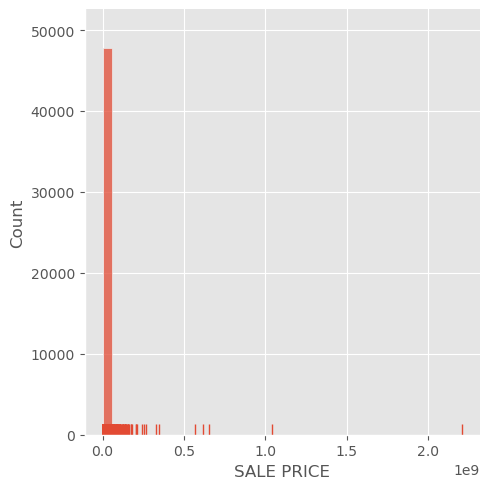

In [71]:
sns.displot(df1['SALE PRICE'], bins=40, rug=True)

In [72]:
# ambil data dari Land Square Feet dari 10.000 - 10.000.000
df2 = df1[(df1['SALE PRICE'] > 10000) & (df1['SALE PRICE'] < 10000000)]

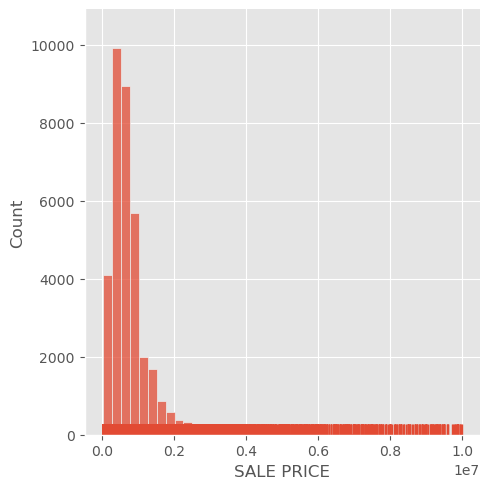

In [73]:
sns.displot(df2['SALE PRICE'], bins=40, rug=True)

In [74]:
df2['SALE PRICE'] = np.log(df2['SALE PRICE'])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2940\638401580.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['SALE PRICE'] = np.log(df2['SALE PRICE'])


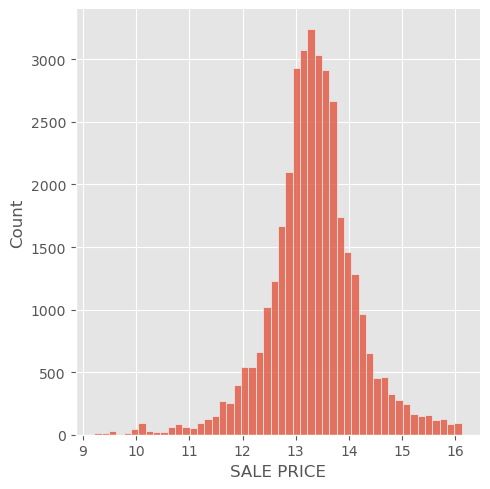

In [75]:
sns.displot(df2['SALE PRICE'], bins=50)

## Confident Interval

Pertanyaan : Berapakah Nilai Conviden Interval untuk proporsi property yang terjual dengan total units > 5 (lebih tinggi dari rata-rata) yang berlokasi wilayah di Manhatthan?

In [76]:
#import modul
import pandas as pd
import numpy as np

In [77]:
df1.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23
9,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,10009,24,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07


In [78]:
df_TotalUnits = df1[['BOROUGH','TOTAL UNITS']]
df_TotalUnits

,BOROUGH,TOTAL UNITS
0,1,5
3,1,10
4,1,6
6,1,8
9,1,24
...,...,...
83778,5,2
83779,5,2
83780,5,2
83781,5,7


In [79]:
total_borough = df_TotalUnits[
    (df_TotalUnits['TOTAL UNITS'] < 5) 
    & (df_TotalUnits['BOROUGH'] == 1)].count()

total_borough = total_borough['BOROUGH']
total_borough

430

In [80]:

total = df_TotalUnits[df_TotalUnits['TOTAL UNITS'] > 5].count()

total = total['TOTAL UNITS']
total

2358

In [81]:
# proporsi property dengan TOTAL UNITS > 5 di wilayah manhattan

p_b = total_borough / total
p_b 

0.1823579304495335

In [82]:
# hitung standard error
n = total
se_b = np.sqrt(p_b * (1 - p_b) / total)
se_b 

0.007951920718247013

In [83]:
# membuat CI dengan z-score 1.96 untuk confidence interval 95%
z_score = 1.96
lcb = p_b - z_score* se_b #lower limit of the CI
ucb = p_b + z_score* se_b #upper limit of the CI
lcb, ucb

(0.16677216584176935, 0.19794369505729764)

## Hypothesis Testing

Pertanyaan : apakah ada perbedaan total units yang terjual di wilayah manhattan dan di broonklyn?

## Hipotesis 
H0: μ1=μ2 Ada perbedaan yang significant

H1: μ1≠μ2 Tidak ada perbedaan yang significant

In [84]:
df1.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23
9,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,10009,24,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07


In [86]:
Manhattan = df1[df1["BOROUGH"] == 1]
Broonklyn = df1[df1["BOROUGH"] == 3]

In [87]:
n1 = len(Manhattan)
mu1 = Manhattan["TOTAL UNITS"].mean()
sd1 = Manhattan["TOTAL UNITS"].std()

(n1, mu1, sd1)

(965, 22.134715025906736, 68.9121643641477)

In [88]:
n2 = len(Broonklyn)
mu2 = Broonklyn["TOTAL UNITS"].mean()
sd2 = Broonklyn["TOTAL UNITS"].std()

(n2, mu2, sd2)

(23843, 2.1942289141467097, 8.707408054816261)

In [91]:
sm.stats.ztest(Manhattan["TOTAL UNITS"].dropna(), Broonklyn["TOTAL UNITS"].dropna(),alternative='two-sided')

(37.8496106914435, 0.0)

Karena p-value (0) sangat kecil, dapat reject the Null hypothesis bahwa rata-rata total units yang terjual di Manatthan sama dengan rata-rata total units yang terjual di manatthan. Dan hasilnya adalah ada perbedaan antara rata-rata total units yang terjual di Manhattan dan di bronklyn yaitu sekitar 19,9405